# Integration Tests 

In [1]:
## Import the Forest-Guided Clustering package
from fgclustering import FgClustering

## Imports for datasets
from palmerpenguins import load_penguins
from sklearn.datasets import load_breast_cancer, load_iris, fetch_california_housing

## Additional imports for use-cases
import pandas as pd

from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Binary Classification: Breast Cancer Dataset

In [2]:
data_breast_cancer = load_breast_cancer(as_frame=True)
data_breast_cancer = data_breast_cancer.frame
data_breast_cancer['target'] = data_breast_cancer['target'].map({0: 'malignant', 1: 'benign'})

X_breast_cancer = data_breast_cancer.loc[:, data_breast_cancer.columns != 'target']
y_breast_cancer = data_breast_cancer.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_breast_cancer, y_breast_cancer)
rf_breast_cancer = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_breast_cancer.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9543057996485061


In [3]:
fgc = FgClustering(model=rf_breast_cancer, data=data_breast_cancer, target_column='target')
fgc.run(max_K=4)

Interpreting RandomForestClassifier


 33%|████████████████████████████                                                        | 1/3 [00:12<00:25, 12.61s/it]

For number of cluster 2 the mean Jaccard Index across clusters is 0.9982165955036659
The stability of each cluster is:
  Cluster 1: Stability 0.99866
  Cluster 2: Stability 0.99778
For number of cluster 2 the score is 0.06613635989234057




 67%|████████████████████████████████████████████████████████                            | 2/3 [00:17<00:08,  8.13s/it]

For number of cluster 3 the mean Jaccard Index across clusters is 0.9539316431266139
The stability of each cluster is:
  Cluster 1: Stability 0.88618
  Cluster 2: Stability 0.99101
  Cluster 3: Stability 0.98460
For number of cluster 3 the score is 0.07478999977783318




100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:24<00:00,  8.28s/it]

For number of cluster 4 the mean Jaccard Index across clusters is 0.8190046771290219
The stability of each cluster is:
  Cluster 1: Stability 0.89626
  Cluster 2: Stability 0.89685
  Cluster 3: Stability 0.97927
  Cluster 4: Stability 0.50365
For number of cluster 4 the score is 0.1105881447883692


Optimal number of cluster is: 2

Processing feature: mean radius

Processing feature: mean texture

Processing feature: mean perimeter

Processing feature: mean area

Processing feature: mean smoothness

Processing feature: mean compactness

Processing feature: mean concavity

Processing feature: mean concave points

Processing feature: mean symmetry

Processing feature: mean fractal dimension

Processing feature: radius error

Processing feature: texture error

Processing feature: perimeter error

Processing feature: area error

Processing feature: smoothness error

Processing feature: compactness error

Processing feature: concavity error

Processing feature: concave points error

Process

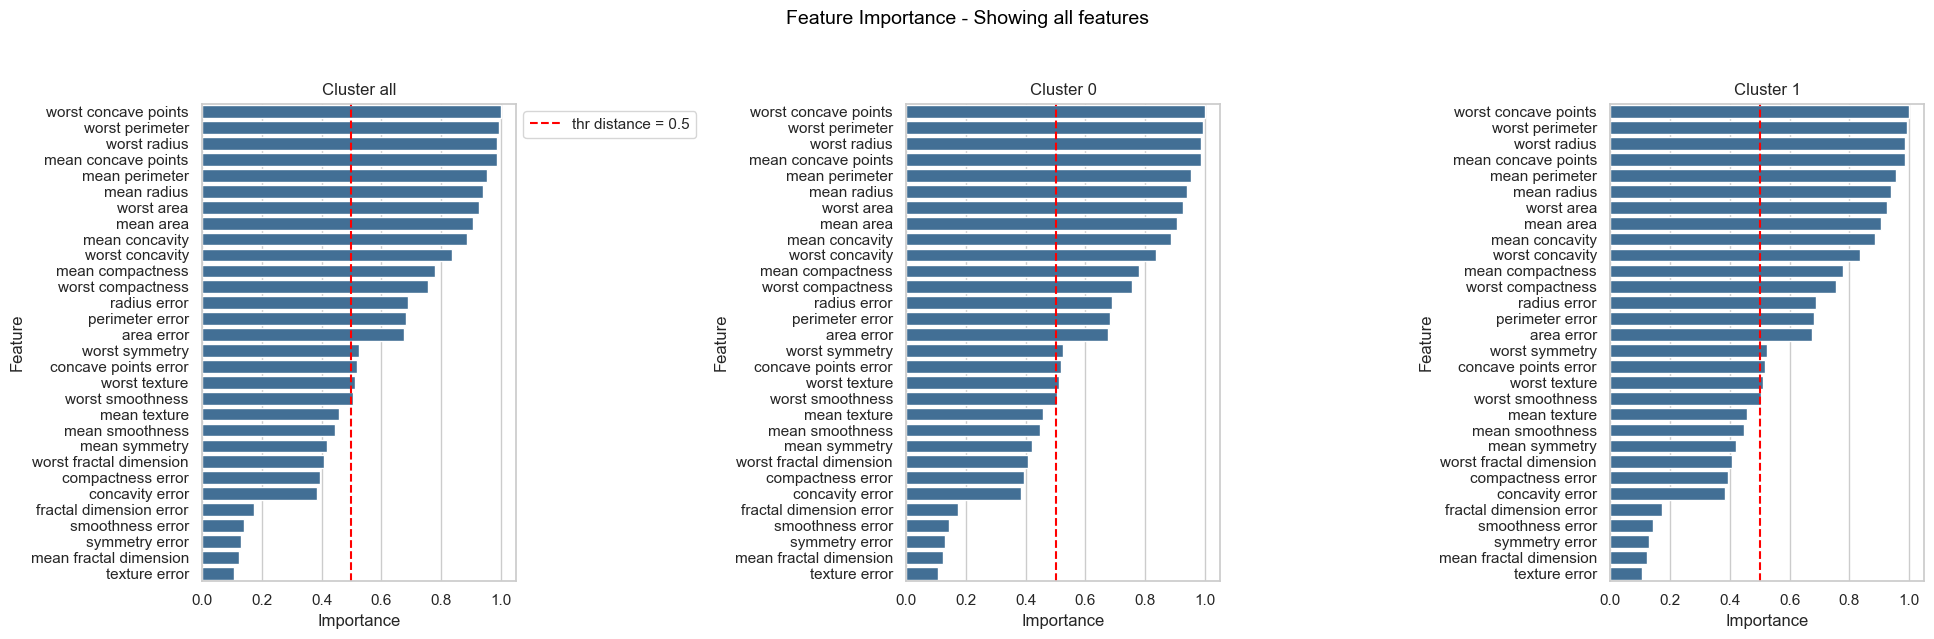

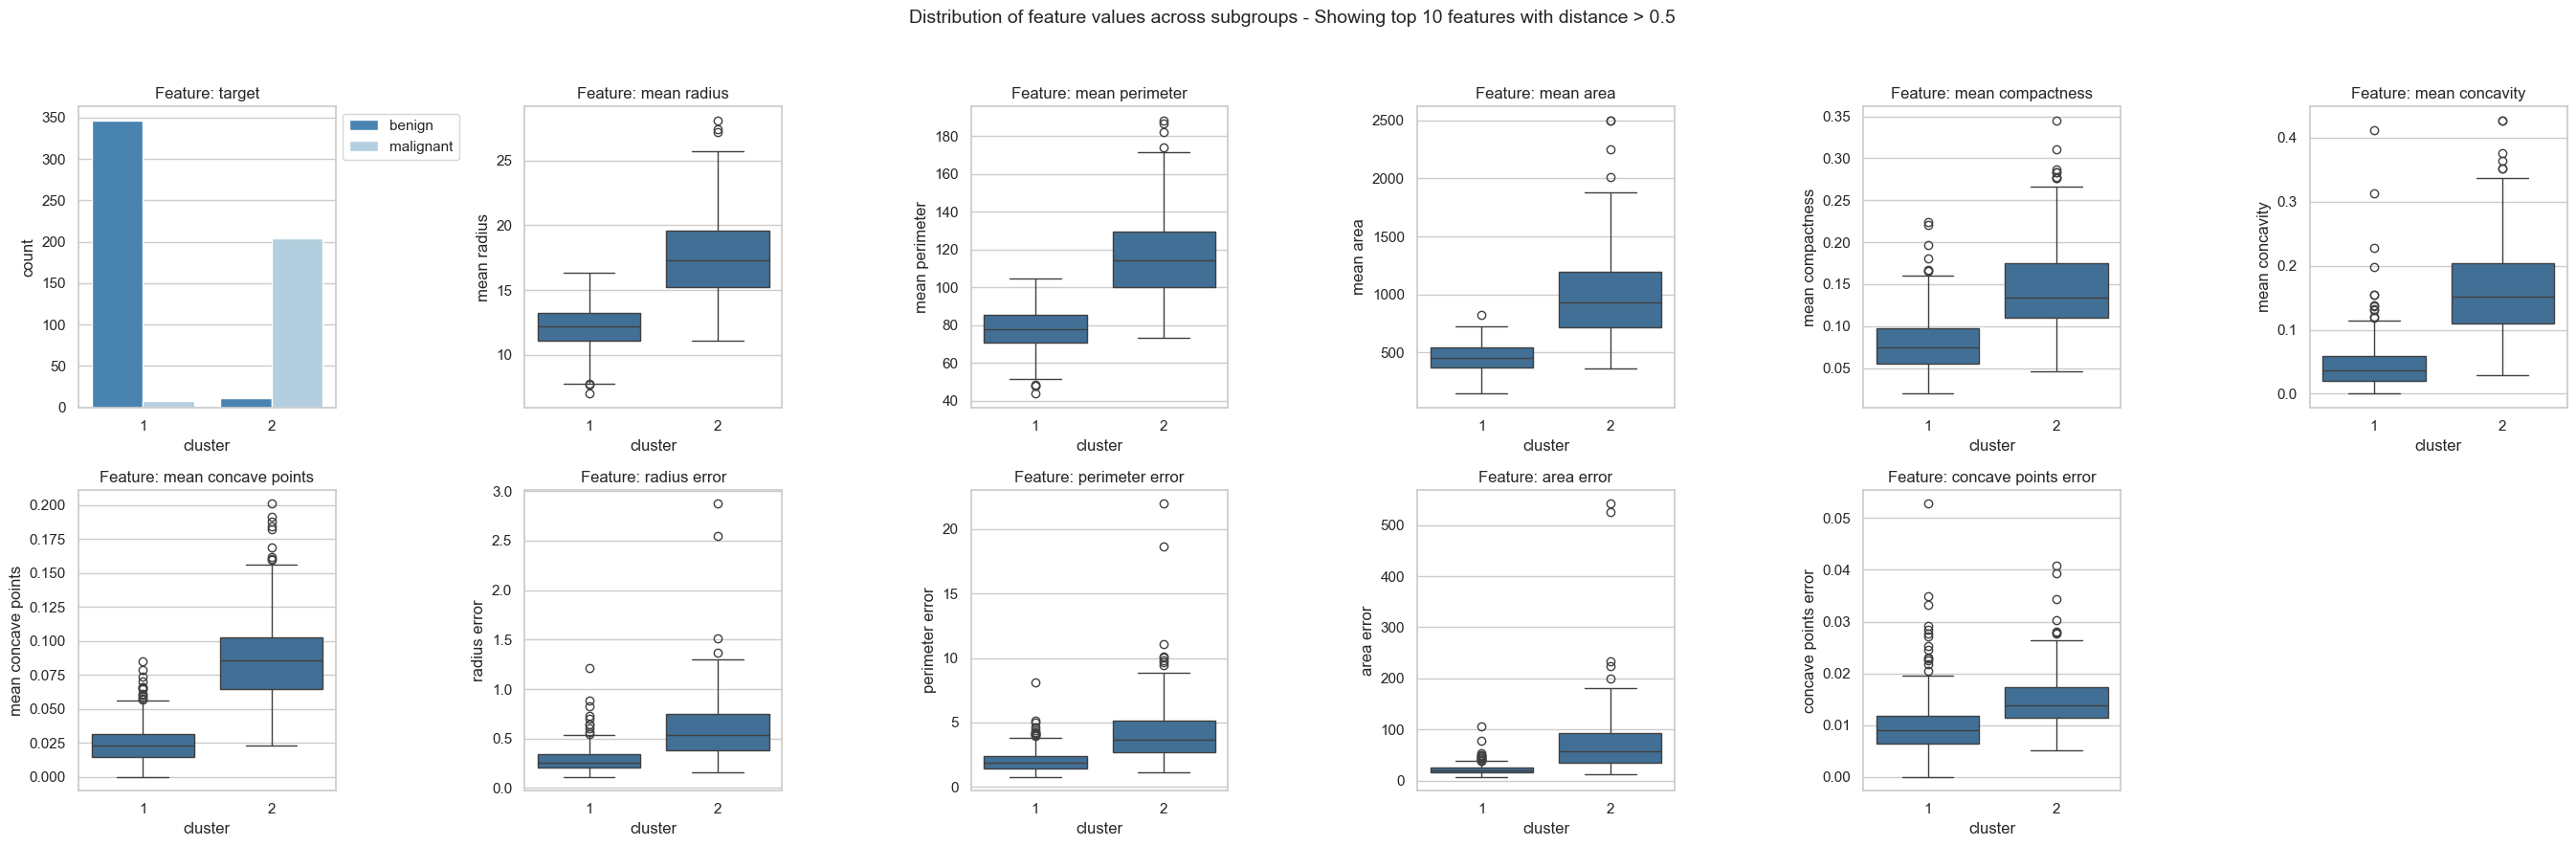

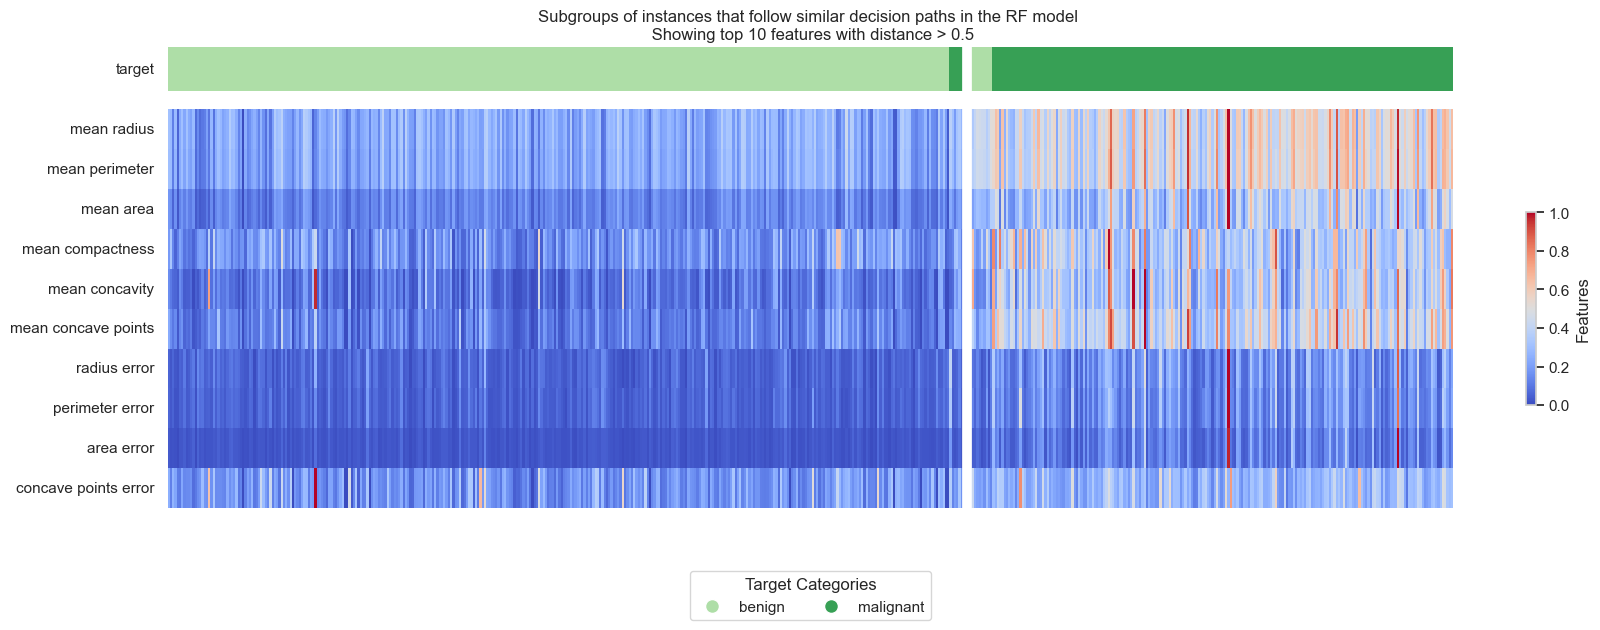

In [4]:
fgc.plot_feature_importance(thr_distance=0.5)
fgc.plot_decision_paths(thr_distance=0.5, top_n=10, num_cols=6)

## Multiclass Classification: Iris Dataset

In [5]:
data_iris = load_iris(as_frame=True)
data_iris = data_iris.frame
data_iris['target'] = data_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

X_iris = data_iris.loc[:, data_iris.columns != 'target']
y_iris = data_iris.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_iris, y_iris)
rf_iris = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_iris.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.9533333333333334


In [6]:
fgc = FgClustering(model=rf_iris, data=data_iris, target_column='target')
fgc.run()

Interpreting RandomForestClassifier


 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.41it/s]

For number of cluster 2 the mean Jaccard Index across clusters is 0.6035602325153644
Clustering is instable, no score computed!




 50%|██████████████████████████████████████████                                          | 2/4 [00:00<00:00,  3.25it/s]

For number of cluster 3 the mean Jaccard Index across clusters is 1.0
The stability of each cluster is:
  Cluster 1: Stability 1.00000
  Cluster 2: Stability 1.00000
  Cluster 3: Stability 1.00000
For number of cluster 3 the score is 0.0630091172123111




 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:01<00:00,  2.26it/s]

For number of cluster 4 the mean Jaccard Index across clusters is 0.8116885444475497
The stability of each cluster is:
  Cluster 1: Stability 0.89115
  Cluster 2: Stability 1.00000
  Cluster 3: Stability 0.93552
  Cluster 4: Stability 0.42008
For number of cluster 4 the score is 0.11057086146949352




100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.99it/s]

For number of cluster 5 the mean Jaccard Index across clusters is 0.7559585545602321
The stability of each cluster is:
  Cluster 1: Stability 0.75958
  Cluster 2: Stability 1.00000
  Cluster 3: Stability 0.93303
  Cluster 4: Stability 0.40768
  Cluster 5: Stability 0.67950
For number of cluster 5 the score is 0.09240634195337258


Optimal number of cluster is: 3

Processing feature: sepal length (cm)

Processing feature: sepal width (cm)

Processing feature: petal length (cm)

Processing feature: petal width (cm)


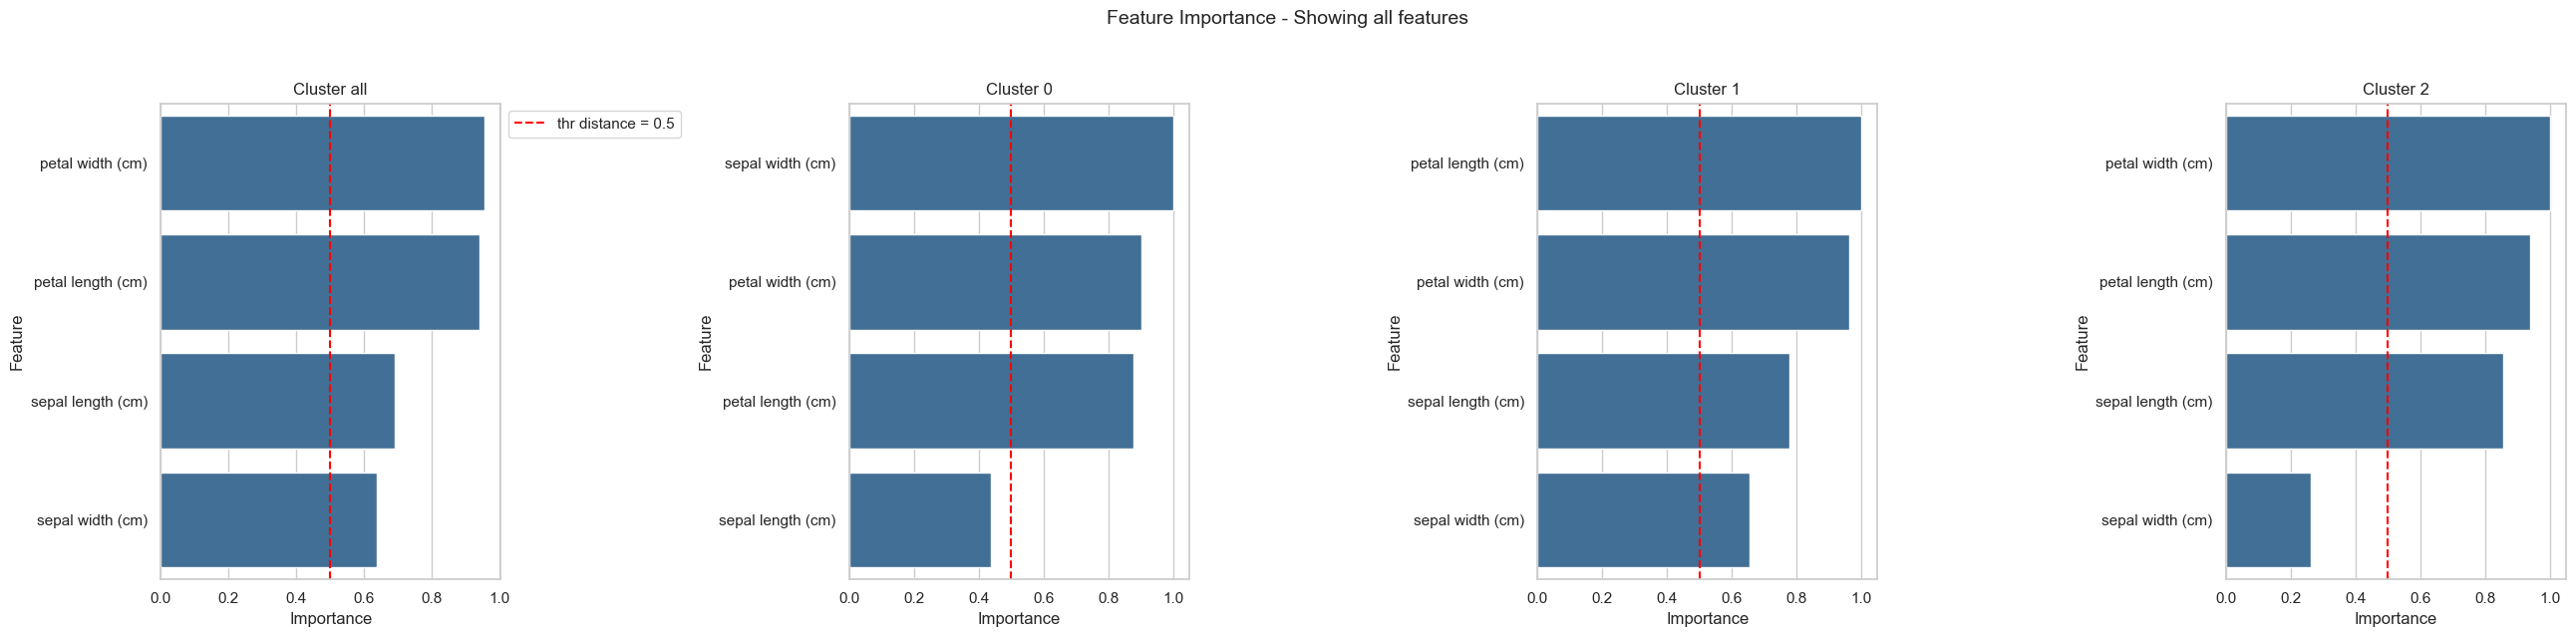

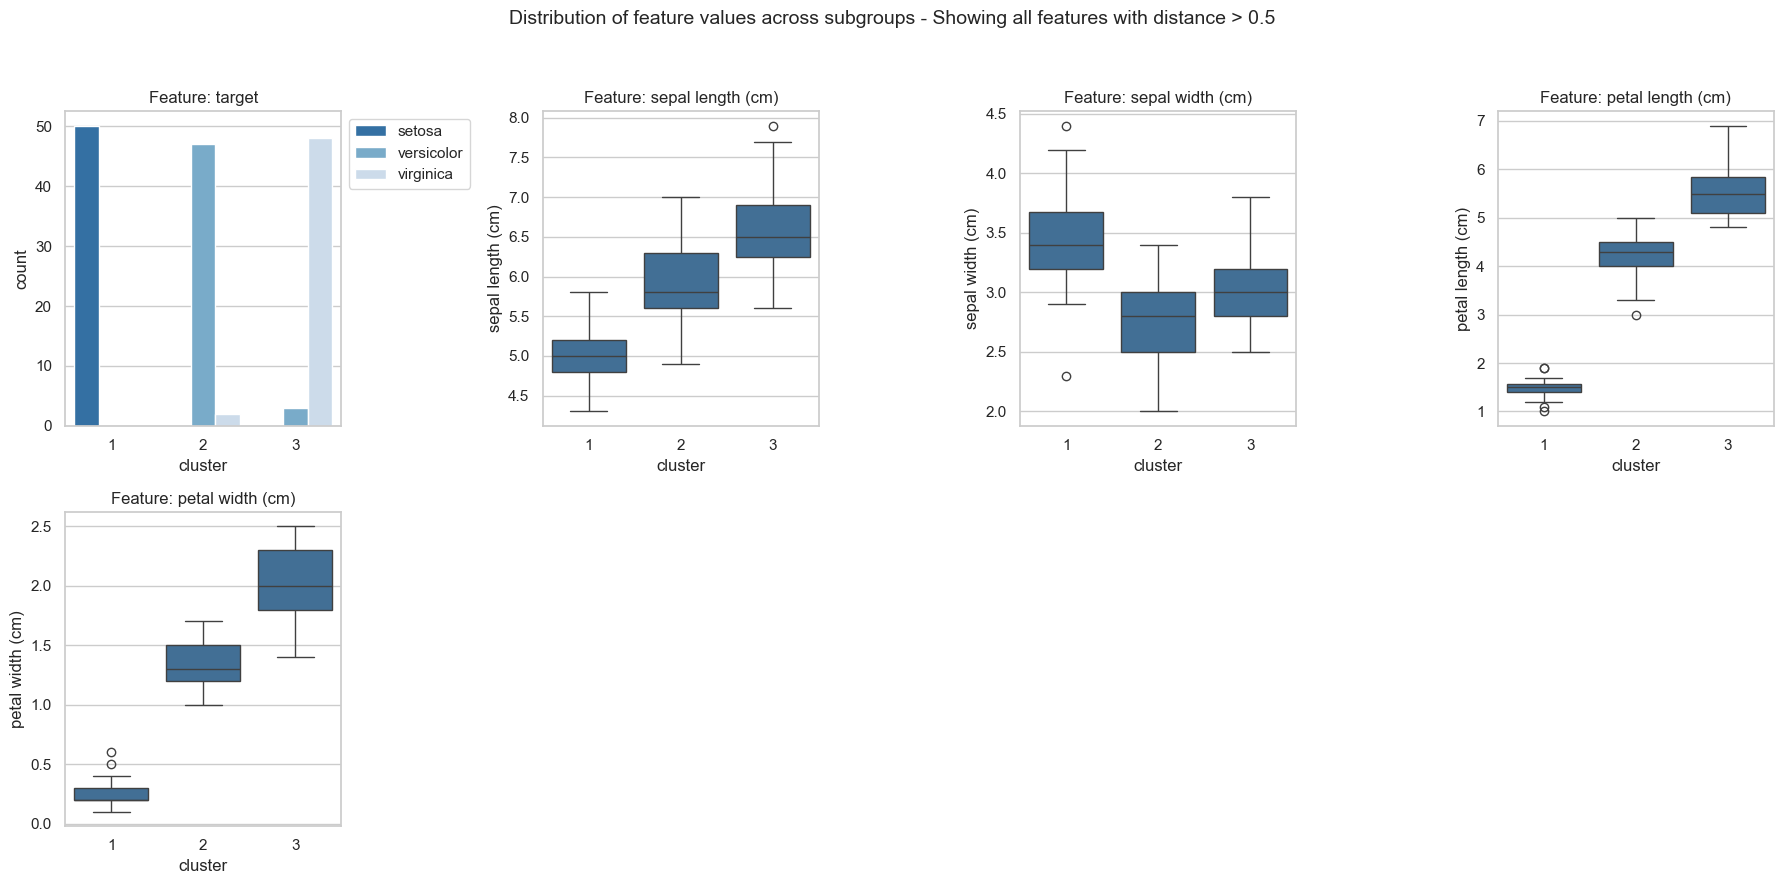

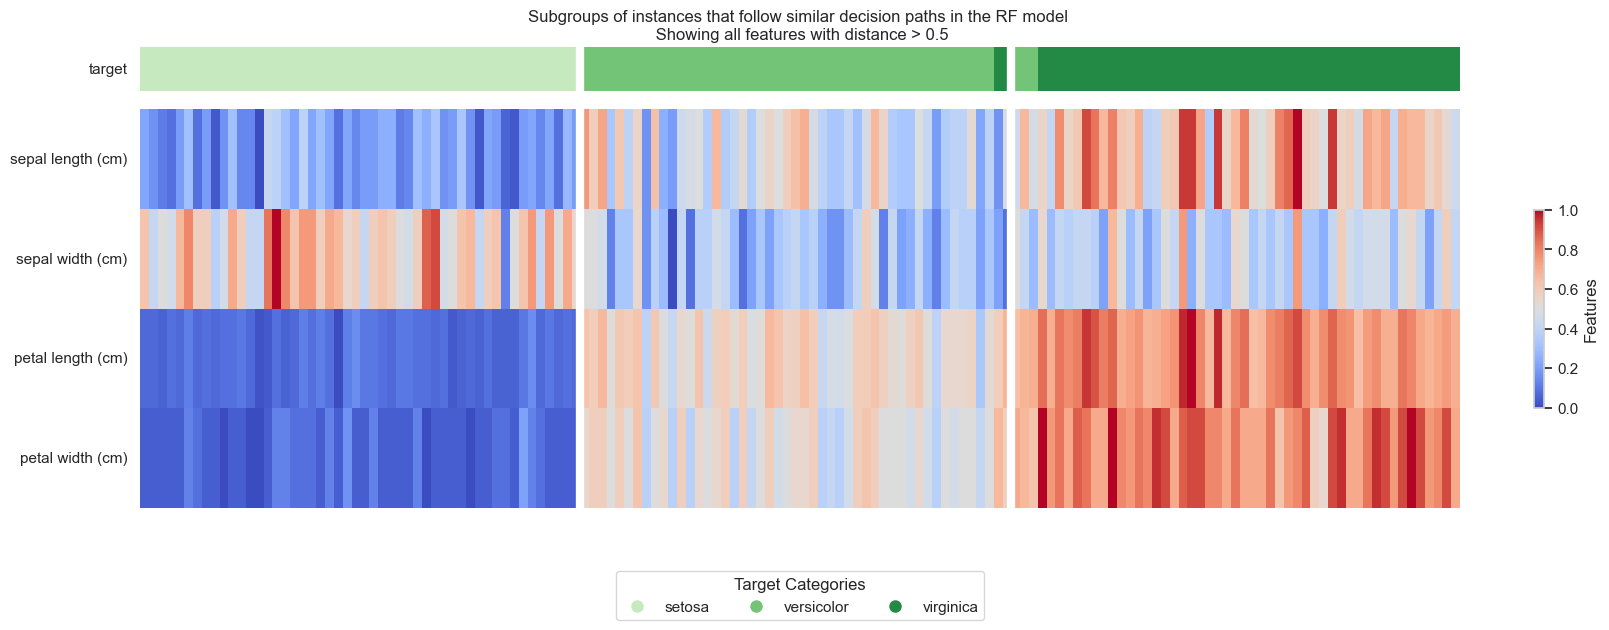

In [7]:
fgc.plot_feature_importance(thr_distance=0.5, num_cols=4)
fgc.plot_decision_paths(thr_distance=0.5, num_cols=4)

## Multiclass Classification: Penguins Dataset

In [8]:
data_penguins = load_penguins()
data_penguins.rename(columns={'species':'target'}, inplace=True)

# Remove the instances with missing values and check how many we are left with
print(f"Before omiting the missing values the dataset has {data_penguins.shape[0]} instances")
data_penguins.dropna(inplace=True)
print(f"After omiting the missing values the dataset has {data_penguins.shape[0]} instances")

# preprocess categorical features such that they can be used for the RF model
data_penguins_encoded = pd.get_dummies(data_penguins, columns=['island', 'sex'], prefix=['island', 'sex'], drop_first=True)

X_penguins = data_penguins_encoded.loc[:, data_penguins_encoded.columns != 'target']
y_penguins = data_penguins_encoded.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestClassifier(max_samples=0.8, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_penguins, y_penguins)
rf_penguins = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB accuracy of prediction model:')
print(rf_penguins.oob_score_)

Before omiting the missing values the dataset has 344 instances
After omiting the missing values the dataset has 333 instances
Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'sqrt'}
OOB accuracy of prediction model:
0.984984984984985


In [9]:
fgc = FgClustering(model=rf_penguins, data=data_penguins_encoded, target_column='target')
fgc.run()

Interpreting RandomForestClassifier


 25%|█████████████████████                                                               | 1/4 [00:01<00:03,  1.09s/it]

For number of cluster 2 the mean Jaccard Index across clusters is 0.9254758915915404
The stability of each cluster is:
  Cluster 1: Stability 0.93492
  Cluster 2: Stability 0.91603
For number of cluster 2 the score is 0.32933697175607646




 50%|██████████████████████████████████████████                                          | 2/4 [00:02<00:02,  1.44s/it]

For number of cluster 3 the mean Jaccard Index across clusters is 0.9959797061817354
The stability of each cluster is:
  Cluster 1: Stability 0.99649
  Cluster 2: Stability 0.99616
  Cluster 3: Stability 0.99529
For number of cluster 3 the score is 0.018666445142142996




 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:05<00:01,  1.80s/it]

For number of cluster 4 the mean Jaccard Index across clusters is 0.9868524458213912
The stability of each cluster is:
  Cluster 1: Stability 0.97187
  Cluster 2: Stability 0.97554
  Cluster 3: Stability 1.00000
  Cluster 4: Stability 1.00000
For number of cluster 4 the score is 0.07721157852502875




100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.12s/it]

For number of cluster 5 the mean Jaccard Index across clusters is 0.7896866769270794
The stability of each cluster is:
  Cluster 1: Stability 0.95902
  Cluster 2: Stability 0.54286
  Cluster 3: Stability 0.79326
  Cluster 4: Stability 1.00000
  Cluster 5: Stability 0.65329
For number of cluster 5 the score is 0.025349233777777824


Optimal number of cluster is: 3

Processing feature: bill_length_mm

Processing feature: bill_depth_mm

Processing feature: flipper_length_mm

Processing feature: body_mass_g

Processing feature: year

Processing feature: island_Dream

Processing feature: island_Torgersen

Processing feature: sex_male


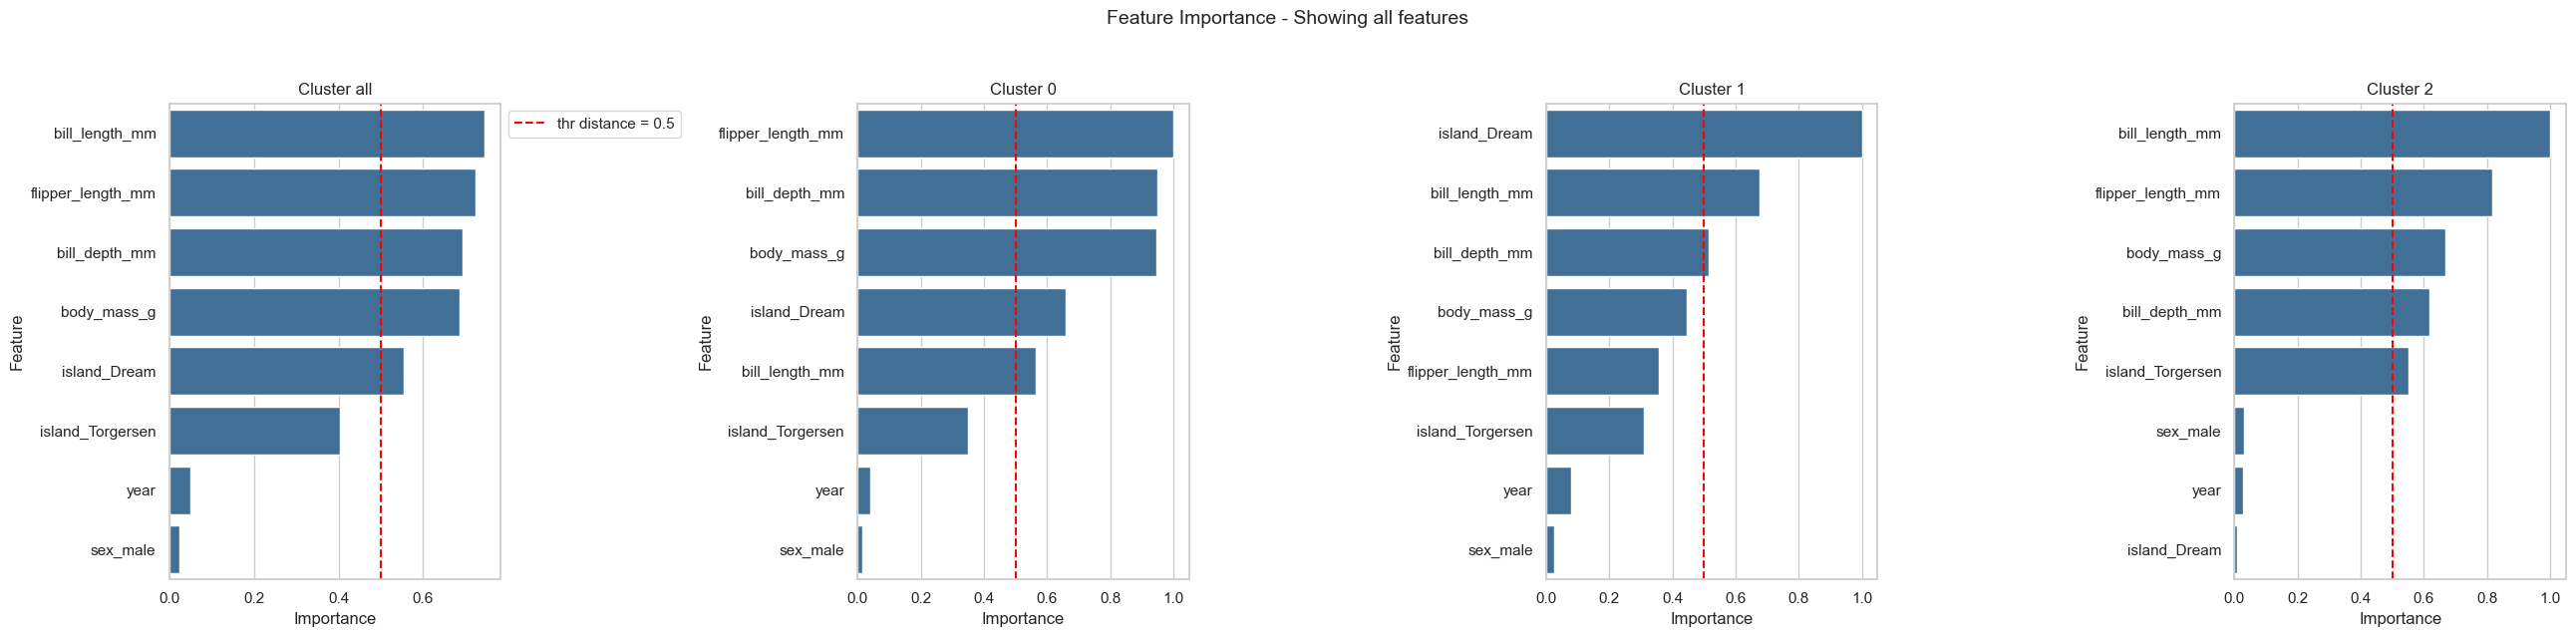

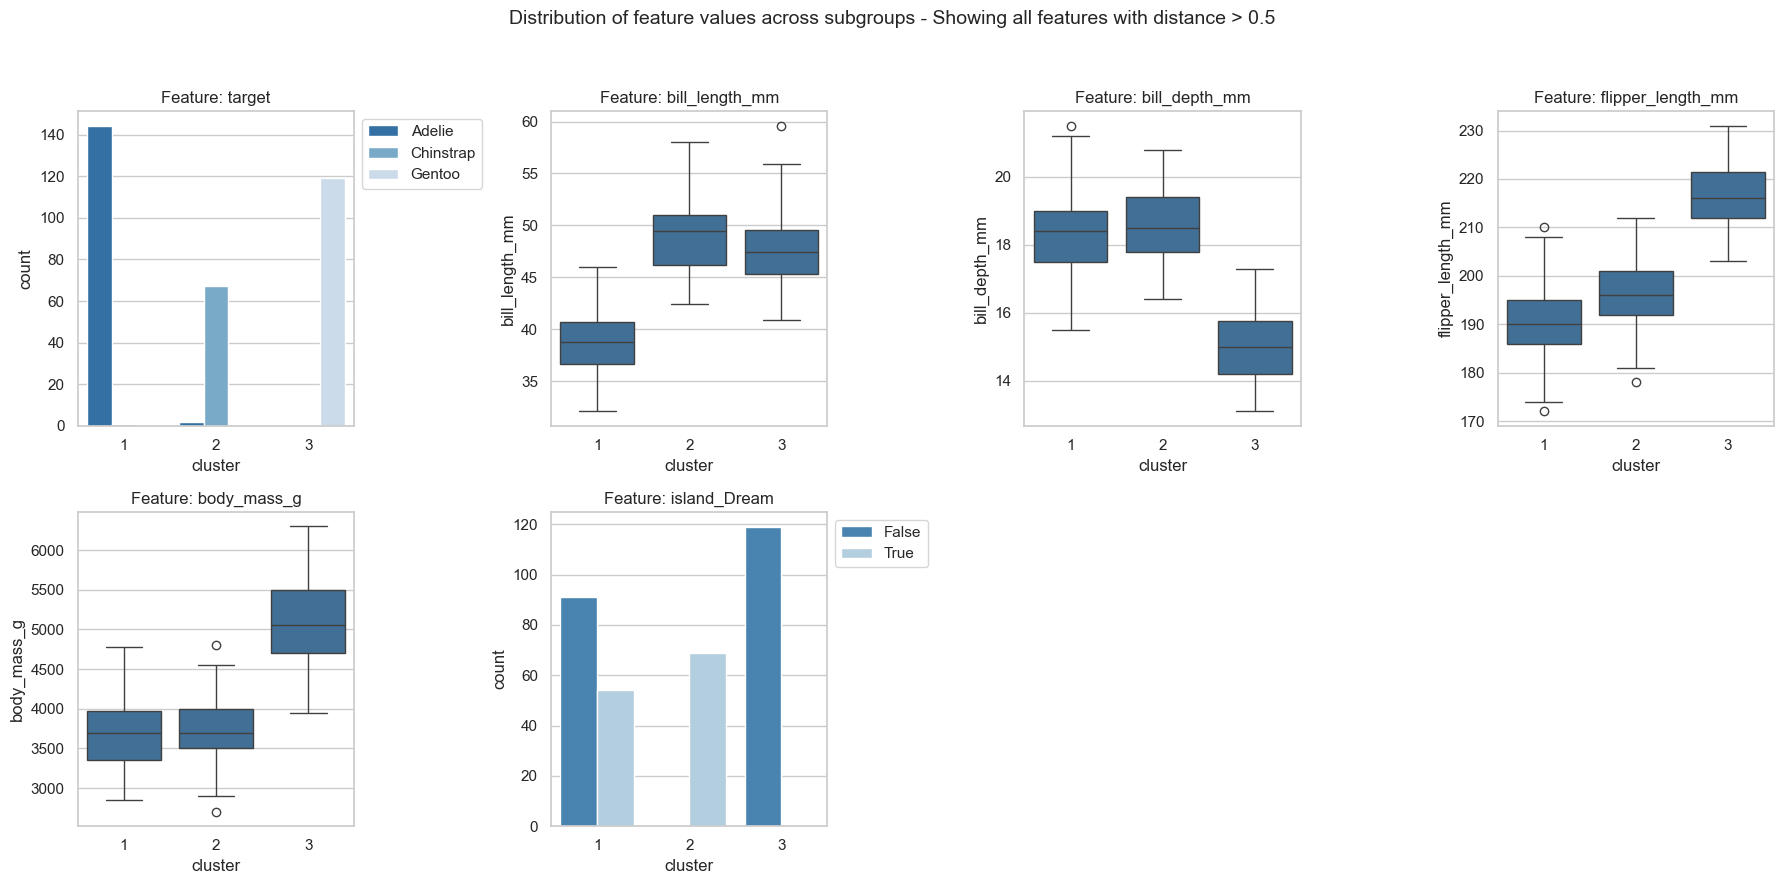

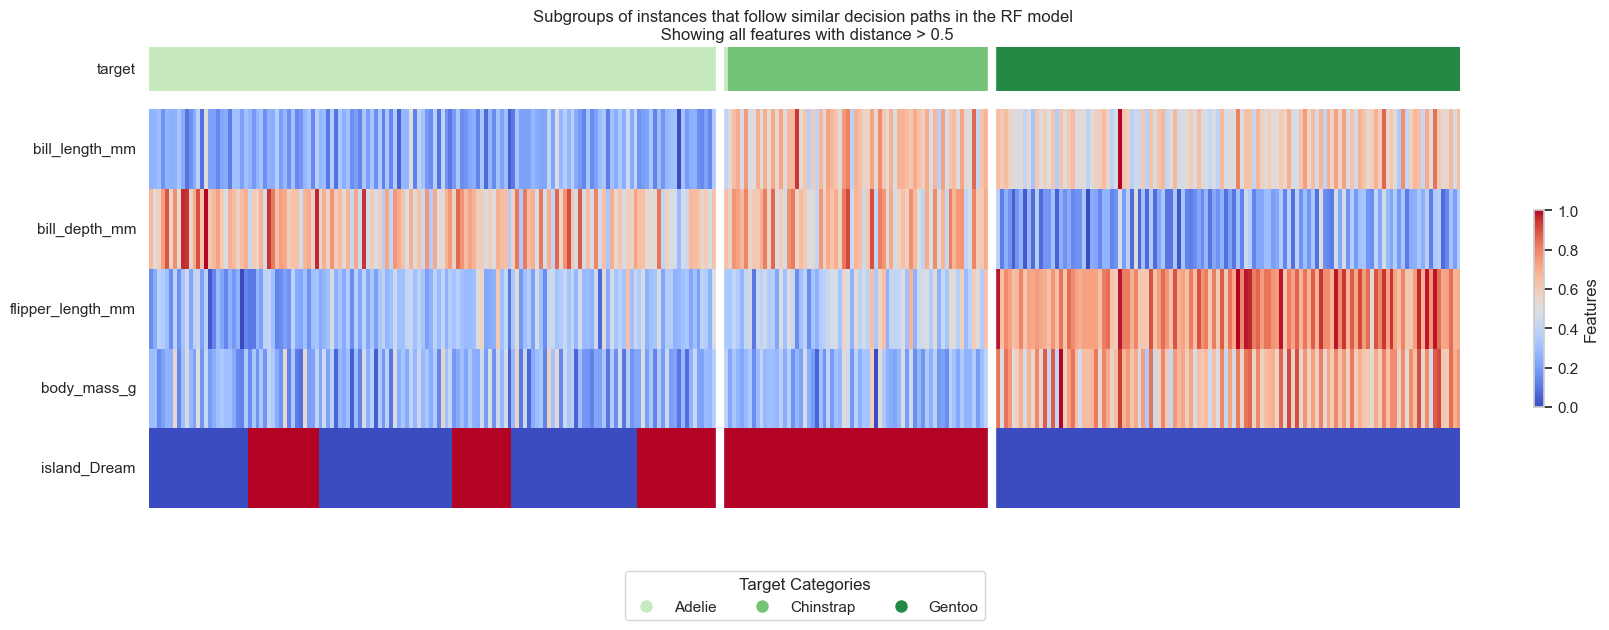

In [10]:
fgc.plot_feature_importance(thr_distance=0.5, num_cols=4)
fgc.plot_decision_paths(thr_distance=0.5, num_cols=4)

In [11]:
fgc.data_clustering_ranked

cluster  target  bill_length_mm  flipper_length_mm  bill_depth_mm  \
0         1  Adelie            39.1              181.0           18.7   
1         1  Adelie            39.5              186.0           17.4   
2         1  Adelie            40.3              195.0           18.0   
3         1  Adelie            36.7              193.0           19.3   
4         1  Adelie            39.3              190.0           20.6   
..      ...     ...             ...                ...            ...   
260       3  Gentoo            47.2              214.0           13.7   
261       3  Gentoo            46.8              215.0           14.3   
262       3  Gentoo            50.4              222.0           15.7   
263       3  Gentoo            45.2              212.0           14.8   
264       3  Gentoo            49.9              213.0           16.1   

     body_mass_g  island_Dream  island_Torgersen  year  sex_male  
0         3750.0         False              True  2007      True  
1         3800.0         False              True  2007     False  
2         3250.0         False              True  2007     False  
3         3450.0         False              True  2007     False  
4         3650.0         False              True  2007      True  
..           ...           ...               ...   ...       ...  
260       4925.0         False             False  2009     False  
261       4850.0         False             False  2009     False  
262       5750.0         False             False  2009      True  
263       5200.0         False             False  2009     False  
264       5400.0         False             False  2009      True  

[333 rows x 10 columns]

In [12]:
X = data_penguins.drop('target', axis=1)
X['island'] = X['island'].astype('category')
X['sex'] = X['sex'].astype('category')

fgc.calculate_statistics(X, target_column=data_penguins.target)

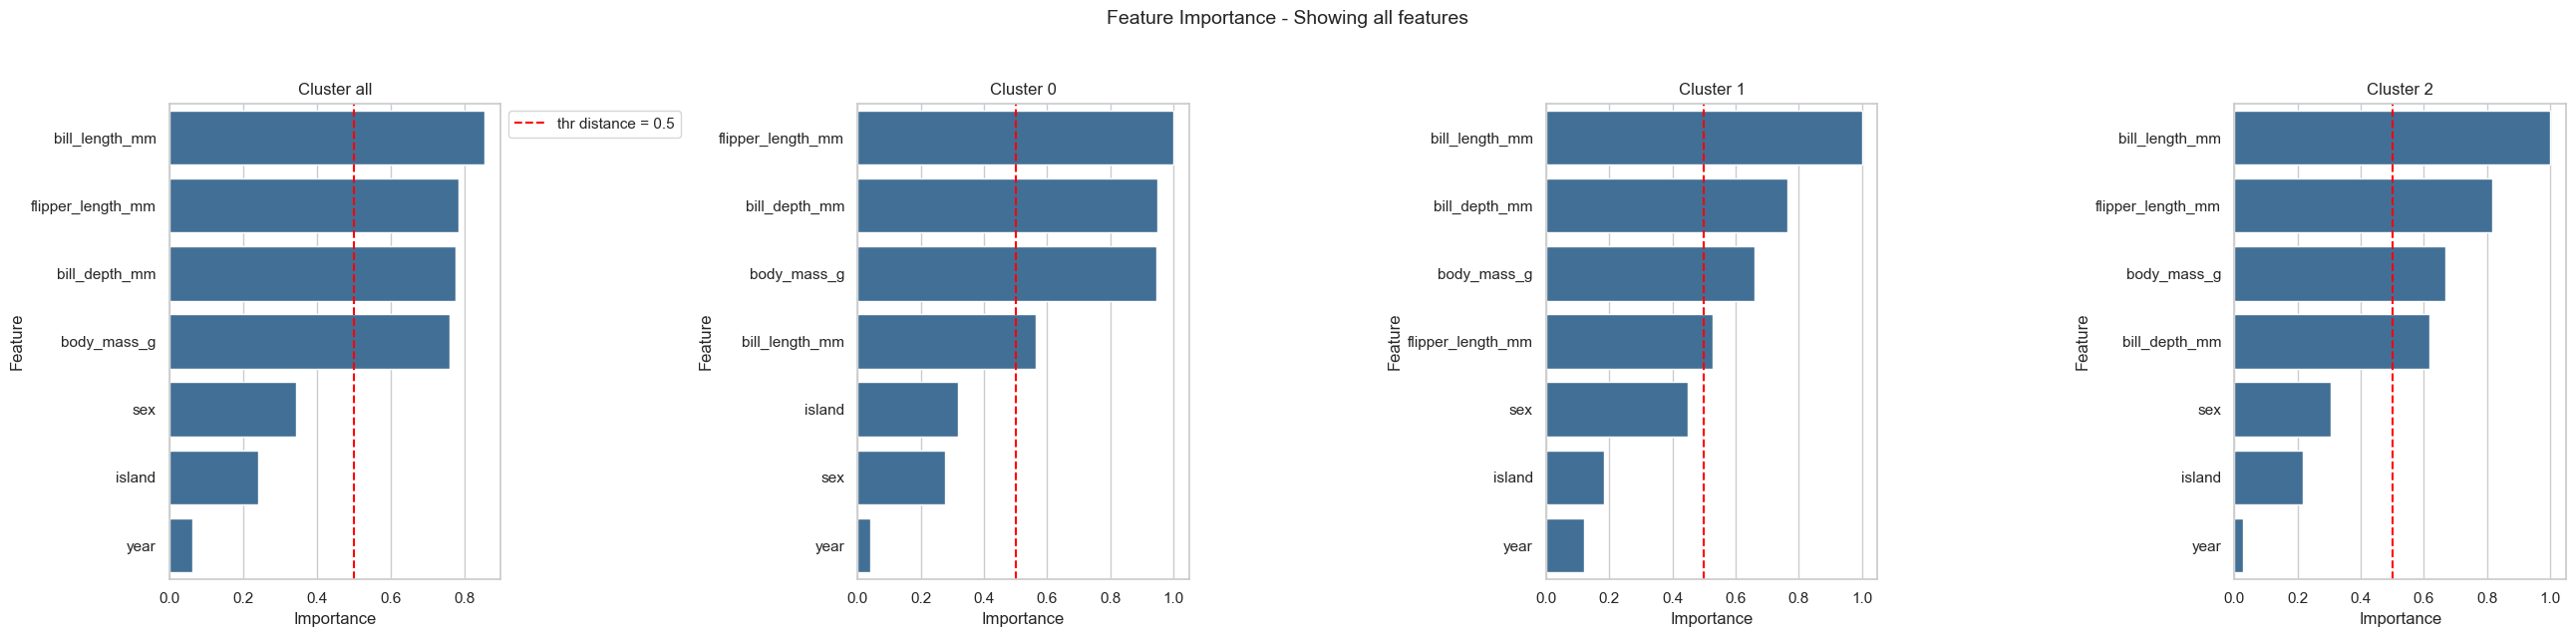

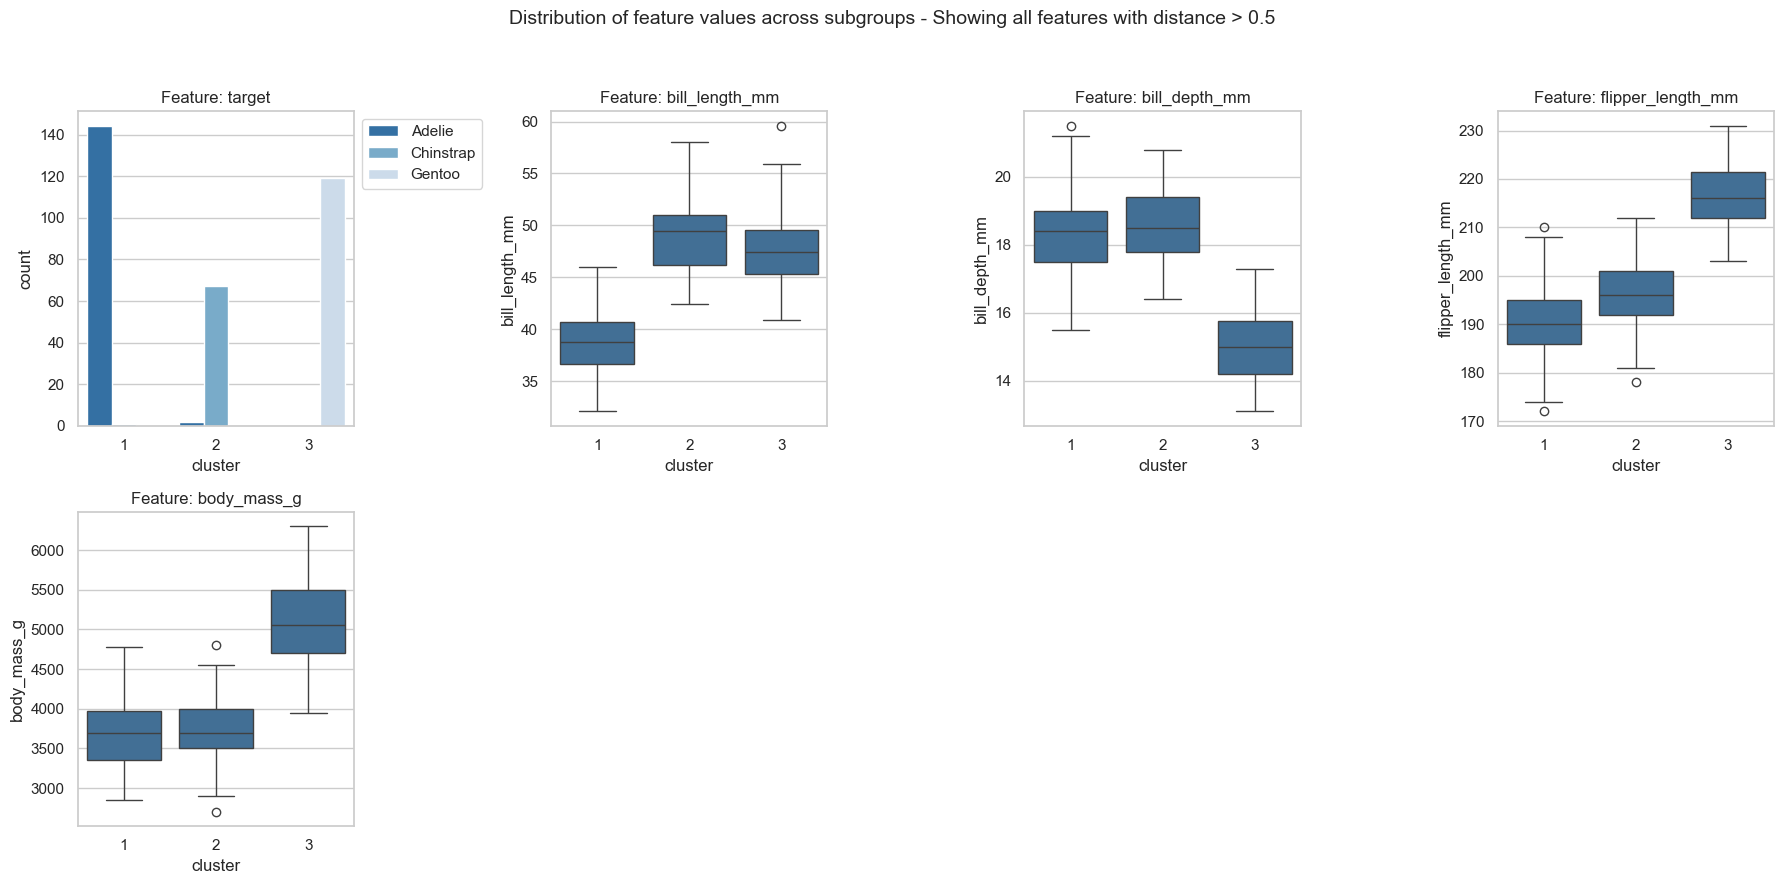

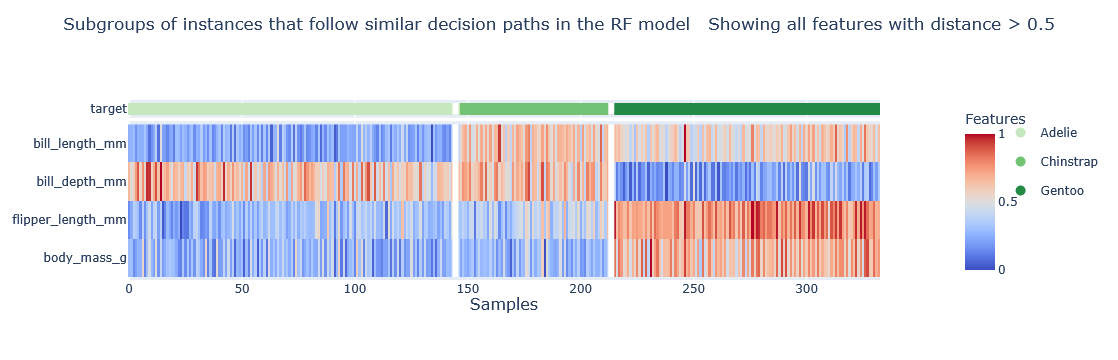

In [13]:
fgc.plot_feature_importance(thr_distance=0.5, num_cols=4)
fgc.plot_decision_paths(thr_distance=0.5, num_cols=4, heatmap_type="interactive")

## Regression: California Housing Dataset

In [14]:
data_housing = fetch_california_housing(as_frame=True)
data_housing = data_housing.frame
data_housing.rename(columns={'MedHouseVal':'target'}, inplace=True)

# for sake of runtime we only use the first 3000 samples
data_housing = data_housing[:3000]
data_housing.head()

X_housing = data_housing.loc[:, data_housing.columns != 'target']
y_housing = data_housing.target

grid = {'max_depth':[2, 5], 'max_features': ['sqrt', 'log2']}
classifier = RandomForestRegressor(n_estimators=100, bootstrap=True, oob_score=True, random_state=42)
grid_classifier = GridSearchCV(classifier, grid, cv=5)
grid_classifier.fit(X_housing, y_housing)
rf_housing = grid_classifier.best_estimator_

print('Parameters of best prediction model:')
print(grid_classifier.best_params_)
print('OOB R^2 of prediction model:')
print(rf_housing.oob_score_)

Parameters of best prediction model:
{'max_depth': 5, 'max_features': 'log2'}
OOB R^2 of prediction model:
0.8143895694575555


In [15]:
fgc = FgClustering(model=rf_housing, data=data_housing, target_column='target')
fgc.run(method_clustering='pam', init_clustering='random', n_jobs=6, discart_value_JI=0.7)

Interpreting RandomForestRegressor


 25%|█████████████████████                                                               | 1/4 [01:10<03:31, 70.40s/it]

For number of cluster 2 the mean Jaccard Index across clusters is 0.9060610824269438
The stability of each cluster is:
  Cluster 1: Stability 0.92988
  Cluster 2: Stability 0.88224
For number of cluster 2 the score is 2647.0841058748933




 50%|██████████████████████████████████████████                                          | 2/4 [01:55<01:50, 55.45s/it]

For number of cluster 3 the mean Jaccard Index across clusters is 0.8815908892821755
The stability of each cluster is:
  Cluster 1: Stability 0.94994
  Cluster 2: Stability 0.83948
  Cluster 3: Stability 0.85535
For number of cluster 3 the score is 2397.9829201428356




 75%|███████████████████████████████████████████████████████████████                     | 3/4 [02:57<00:58, 58.28s/it]

For number of cluster 4 the mean Jaccard Index across clusters is 0.7258638491660746
The stability of each cluster is:
  Cluster 1: Stability 0.75719
  Cluster 2: Stability 0.55624
  Cluster 3: Stability 0.84251
  Cluster 4: Stability 0.74752
For number of cluster 4 the score is 2266.7606374339584




100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:33<00:00, 68.30s/it]

For number of cluster 5 the mean Jaccard Index across clusters is 0.6756104858733316
Clustering is instable, no score computed!


Optimal number of cluster is: 4



Processing feature: MedInc

Processing feature: HouseAge

Processing feature: AveRooms

Processing feature: AveBedrms

Processing feature: Population

Processing feature: AveOccup

Processing feature: Latitude

Processing feature: Longitude


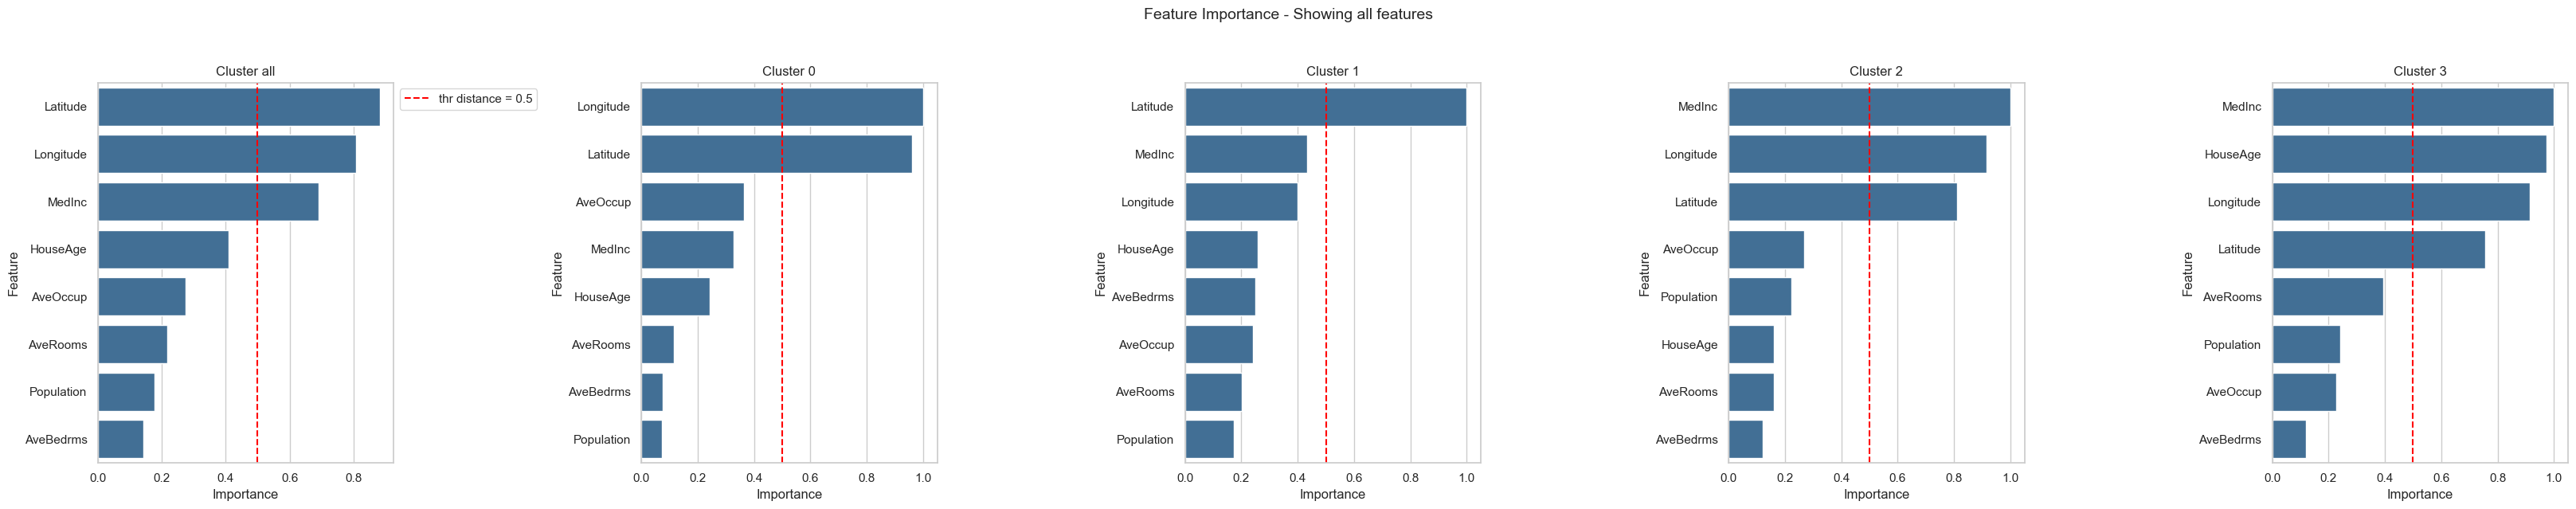

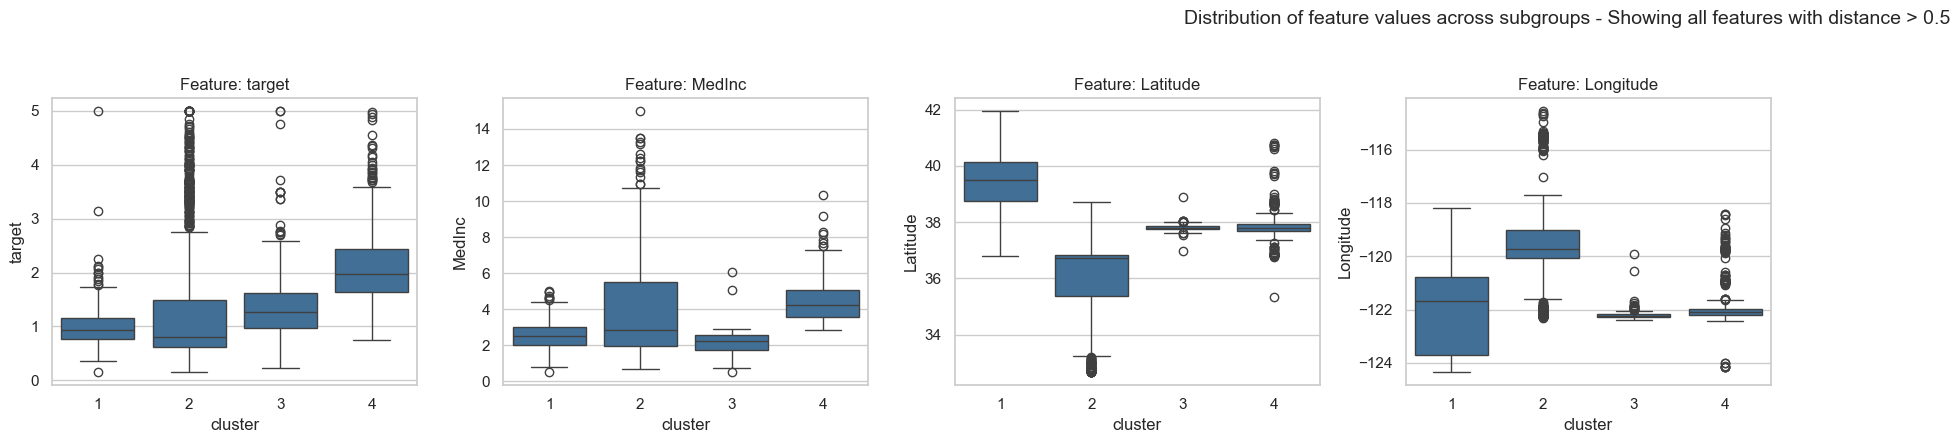

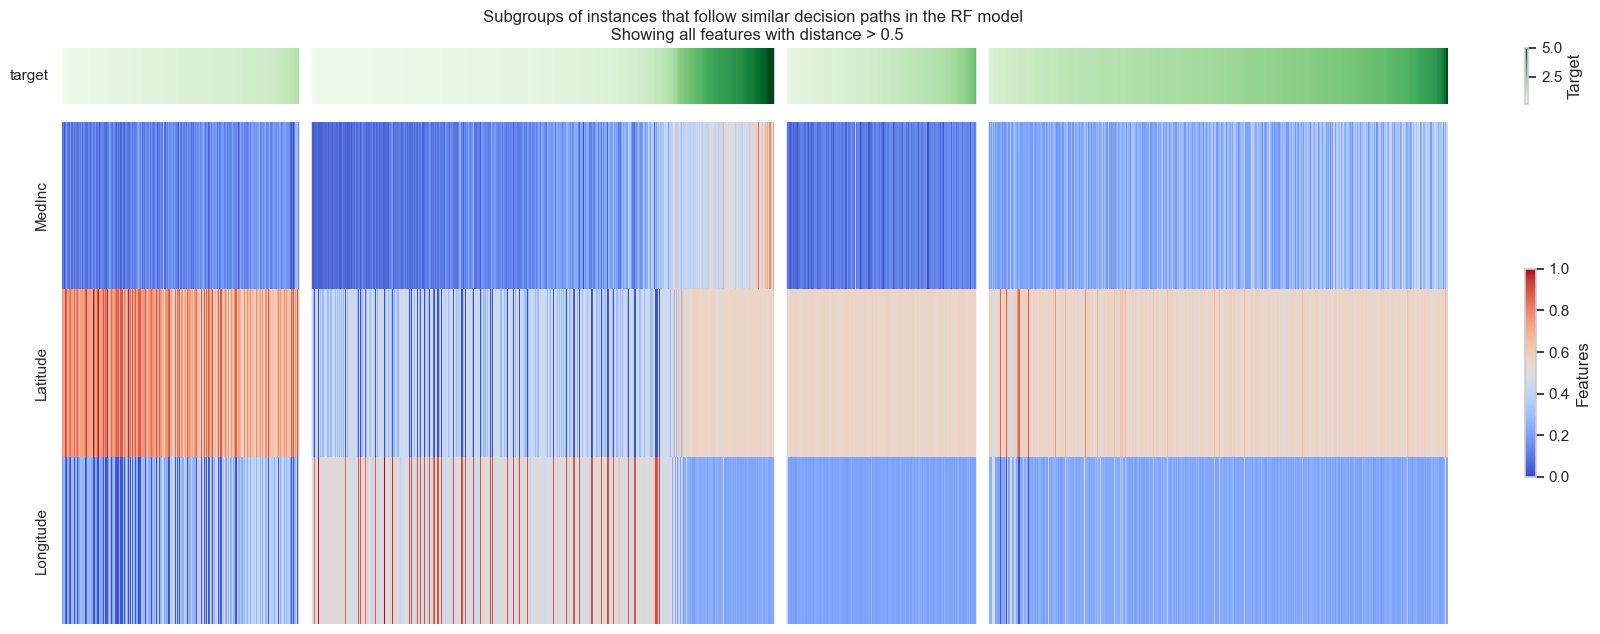

In [16]:
fgc.plot_feature_importance(thr_distance=0.5, num_cols=7)
fgc.plot_decision_paths(thr_distance=0.5, num_cols=7)

In [17]:
fgc_fast = FgClustering(model=rf_housing, data=data_housing, target_column='target')
fgc_fast.run(method_clustering='alternate', init_clustering='random', n_jobs=6)

Interpreting RandomForestRegressor


 25%|█████████████████████                                                               | 1/4 [00:11<00:35, 11.90s/it]

For number of cluster 2 the mean Jaccard Index across clusters is 0.9076173498130089
The stability of each cluster is:
  Cluster 1: Stability 0.92792
  Cluster 2: Stability 0.88731
For number of cluster 2 the score is 1909.6995878481864




 50%|██████████████████████████████████████████                                          | 2/4 [00:23<00:23, 11.59s/it]

For number of cluster 3 the mean Jaccard Index across clusters is 0.740233525498677
The stability of each cluster is:
  Cluster 1: Stability 0.60012
  Cluster 2: Stability 0.93010
  Cluster 3: Stability 0.69048
For number of cluster 3 the score is 1997.8183905229025




 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:34<00:11, 11.39s/it]

For number of cluster 4 the mean Jaccard Index across clusters is 0.6048453555029348
Clustering is instable, no score computed!




100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:44<00:00, 11.20s/it]

For number of cluster 5 the mean Jaccard Index across clusters is 0.6055505076422516
Clustering is instable, no score computed!


Optimal number of cluster is: 2

Processing feature: MedInc

Processing feature: HouseAge

Processing feature: AveRooms

Processing feature: AveBedrms

Processing feature: Population

Processing feature: AveOccup

Processing feature: Latitude

Processing feature: Longitude


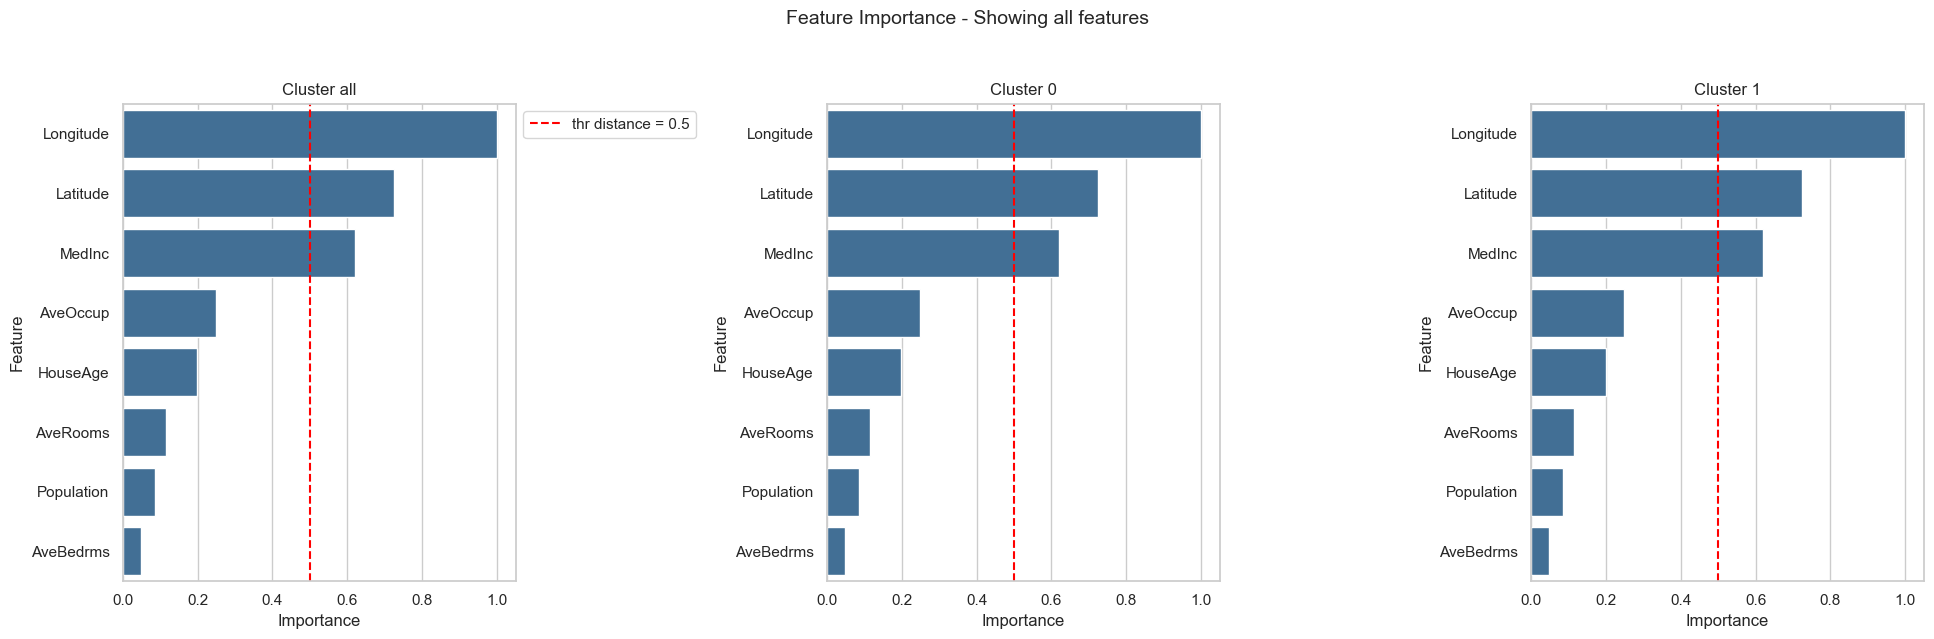

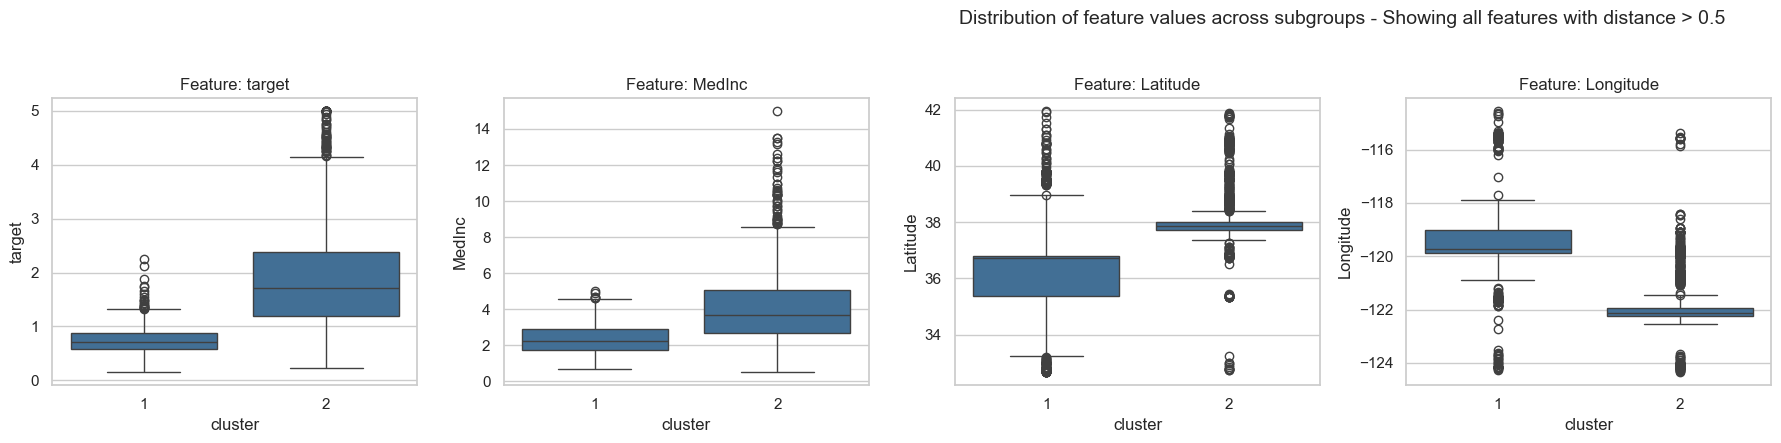

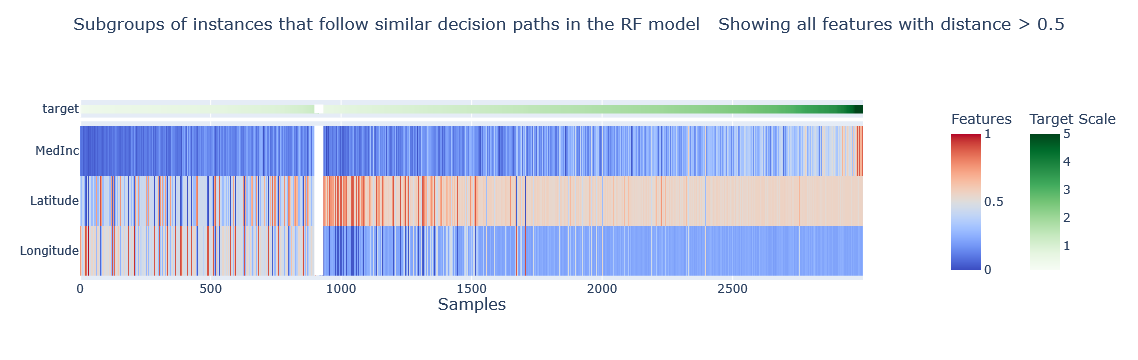

In [18]:
fgc_fast.plot_feature_importance(thr_distance=0.5)
fgc_fast.plot_decision_paths(thr_distance=0.5, heatmap_type="interactive")